In [ ]:
import json
import os
import glob

#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
# function to print sentiments
# of the sentence.
   
    

count = 0
answers_sentiments = {}
classifier = pipeline("sentiment-analysis")

path = r'C:\\Users\\maganti\\Documents\\INFO 5502 Chen Sir Project UNT\\Web Scraping Interviews\\Narrators Json Files-With Q&A'
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.     
    #print(filename)
    with open(filename, mode = 'rb') as currentFile:
        data = json.loads(currentFile.read())
        try:
            if data['transcript'] != {}:
                for segment in data["transcript"].keys():
                    for question in data["transcript"][segment]['Segment Q&A'].keys():
                        answers_sentiments[data["transcript"][segment]['Segment Q&A'][question]] = classifier(data["transcript"][segment]['Segment Q&A'][question], truncation=True)[0]['label']
                        count = count + 1
                        #print()
                        #for answer in data["transcript"][segment]['Segment Q&A'][question]:
                        #    print(answer)
                        #segment_questions_list.append(' '.join(i for i in question.split()[1:]))
                        #print(' '.join(i for i in question.split()[1:]))
                        #print(data['transcript'][segment]['Segment Questions'][question])
                #print(answers_sentiments)
                #print(count)    
                
            else:
                pass
        except Exception as e:
            print(e)
        
#print(len(segment_questions_list))
print()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [ ]:
import pandas as pd
df = pd.DataFrame(answers_sentiments.items(), columns=['Answer', 'Sentiment'])

file_name = r"C:\\Users\\maganti\\Documents\\INFO 5502 Chen Sir Project UNT\\Web Scraping Interviews\\CSV Files\\Sentiments_of_answers_using_transformers.csv"
df.to_csv(file_name, index= False)

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\\Users\\maganti\\Documents\\INFO 5502 Chen Sir Project UNT\\Web Scraping Interviews\\CSV Files\\Sentiments_of_answers_using_transformers.csv")
df.shape

(128491, 2)

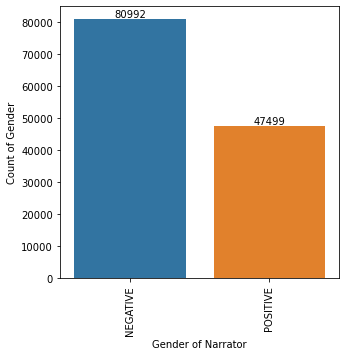

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [5,5]
ax = sns.countplot(x='Sentiment', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel("Gender of Narrator")
plt.ylabel("Count of Gender")
plt.xticks(rotation=90)
plt.show()